In [1]:
import numpy as np
from qmlab.qfm import QuantumFeatureMap
from qiskit_algorithms.utils import algorithm_globals
from qmlab.preprocessing import parse_biomed_data_to_ndarray, reduce_feature_dim
from sklearn.model_selection import train_test_split
from qmlab.kernel import SVCLoss
from qiskit.primitives import Sampler

from qmlab.kernel import TrainableQuantumKernel

random_state = 12345 
algorithm_globals.random_seed = random_state
np.random.seed(random_state)

In [2]:
X, y = parse_biomed_data_to_ndarray("sobar_new")
X = reduce_feature_dim(X, num_features=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50, 2)
(22, 2)
(50,)
(22,)


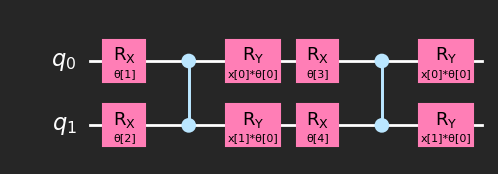

In [3]:
num_features = X_train.shape[1]
num_qubits = num_features
reps = 2

qfm = QuantumFeatureMap(
    feature_dimension=num_features, 
    num_qubits=num_qubits,
    reps=reps,
    gates=['rx', 'cz', 'RY'],
    entanglement='linear',
    data_scaling=True,
)
qfm.draw(plot_barriers=False, fold=150, output="mpl", style="iqp-dark")

In [4]:
backend = Sampler()

In [5]:
loss = SVCLoss(C=1)
init_params = np.random.uniform(0, 2 * np.pi, len(qfm.training_params))

In [6]:
kernel = TrainableQuantumKernel(feature_map=qfm, training_params=qfm.training_params)
loss.plot_loss(kernel, X_train, y_train, parameter=init_params, grid=[0, 8, 50], show=True)

ValueError: The number of values (4) does not match the number of parameters (14) for the 0-th circuit.